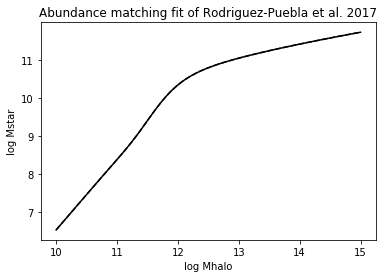

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def compute_abundance_matching_RodriguezPuebla(aexp, Mhalo):
    """Implement abundance matching fit of Rodriguez-Puebla et al. 2017"""

    z = 1./aexp-1.0
    M = np.array(Mhalo)

    def P(x, y, z):
        return y*z - x*z/(1+z)

    def Q(z):
        return np.exp(-4/(1.+z)**2)

    def g(x, a, g, d):
        return (-np.log10(10**(-a*x)+1.) +
                d*(np.log10(1.+np.exp(x)))**g/(1.+np.exp(10**(-x))))

    al = (1.975, 0.714, 0.042)
    de = (3.390, -0.472, -0.931)
    ga = (0.498, -0.157)
    ep = (-1.758, 0.110, -0.061, -0.023)
    M0 = (11.548, -1.297, -0.026)

    alpha = al[0] + P(al[1], al[2], z) * Q(z)
    delta = de[0] + P(de[1], de[2], z) * Q(z)
    gamma = ga[0] + P(ga[1], 0, z) * Q(z)

    eps = 10**(ep[0] + P(ep[1], ep[2], z)*Q(z) + P(ep[3], 0, z))
    M1 = 10**(M0[0] + P(M0[1], M0[2], z)*Q(z))

    x = np.log10(M/M1)
    g1 = g(x, alpha, gamma, delta)
    g0 = g(0, alpha, gamma, delta)

    Ms = 10**(np.log10(eps*M1) + g1 - g0)

    return Ms

Mhalo = np.logspace(10, 15, 100)

z = 0
aexp = 1. / ( 1. + z)
Ms = compute_abundance_matching_RodriguezPuebla(aexp, Mhalo)

z = 2
aexp = 1. / ( 1. + z)
Ms2 = compute_abundance_matching_RodriguezPuebla(aexp, Mhalo)


plt.title('Abundance matching fit of Rodriguez-Puebla et al. 2017')
plt.plot(np.log10(Mhalo), np.log10(Ms), '-k')
plt.plot(np.log10(Mhalo), np.log10(Ms2), '--k')
plt.xlabel('log Mhalo')
plt.ylabel('log Mstar')
plt.show()